# Atividade Aula 7 - Valores Nulos
substitua os valores faltantes do atributo age da base de dados pela mediana presentes nos dados da primeira, segunda e terceira classes da base de dados titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


<Axes: ylabel='age'>

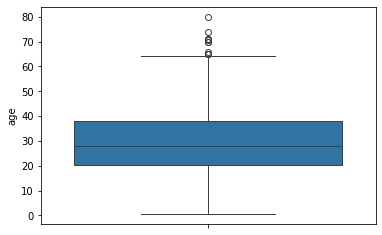

In [6]:
sns.boxplot(df['age'])

<Axes: xlabel='pclass', ylabel='age'>

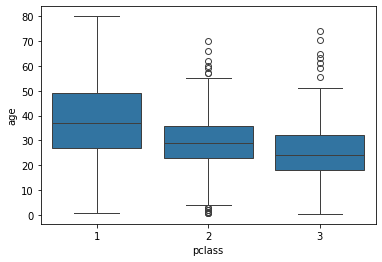

In [7]:
sns.boxplot(data=df, x='pclass', y='age')

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

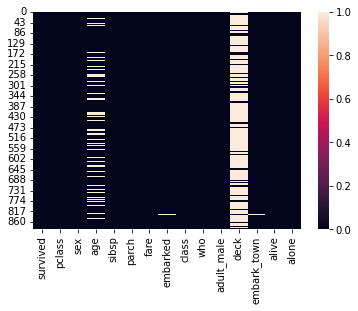

In [9]:
sns.heatmap(df.isnull())

In [10]:
177/890

0.19887640449438201

In [11]:
# calcular a mediana de idade da pclass
mediana_pclass1 = df[df['pclass'] == 1]['age'].median()
print(mediana_pclass1)

37.0


In [12]:
mediana_pclass2 = df[df['pclass'] == 2]['age'].median()
print(mediana_pclass2)

29.0


In [13]:
mediana_pclass3 = df[df['pclass'] == 3]['age'].median()
print(mediana_pclass3)

24.0


In [14]:
# Percorrer as linhas do df e, onde a linha de idade for nula, ira preencher com a mediana de acordo com o indice

for i, valor in df.iterrows():
    if pd.isnull(valor['age']):
        if valor['pclass'] == 1:
            df.at[i, 'age'] = mediana_pclass1
            
        elif valor['pclass'] == 2:
            df.at[i, 'age'] = mediana_pclass2
            
        elif valor['pclass']  == 3:
            df.at[i, 'age'] = mediana_pclass3


In [15]:
# conferindo
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

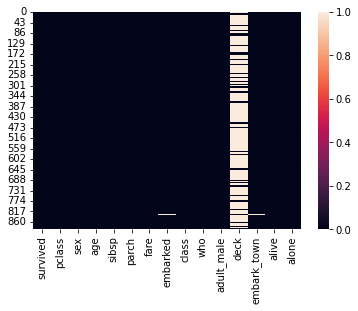

In [17]:
sns.heatmap(df.isnull())

In [18]:
print(df.iloc[888])

survived                 0
pclass                   3
sex                 female
age                   24.0
sibsp                    1
parch                    2
fare                 23.45
embarked                 S
class                Third
who                  woman
adult_male           False
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 888, dtype: object
